In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Cleaned Dataset.csv')

In [3]:
# import pandas as pd
# import pandas_profiling

# # load sample dataset
# df = pd.read_csv('sample_dataset.csv')

# # generate report
# report = pandas_profiling.ProfileReport(df)

In [4]:
df.shape

(18840, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18840 entries, 0 to 18839
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18840 non-null  int64  
 1   product_id    18840 non-null  int64  
 2   product name  18840 non-null  object 
 3   sale_price    18840 non-null  float64
 4   market_price  18840 non-null  float64
 5   user_id       18840 non-null  int64  
 6   rating        18840 non-null  float64
 7   Rate          18840 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.2+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product name', 'sale_price',
       'market_price', 'user_id', 'rating', 'Rate'],
      dtype='object')

In [7]:

df.head()

,Unnamed: 0,product_id,product name,sale_price,market_price,user_id,rating,Rate
0,0,100001,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.0,2,4.1,4
1,1,100002,Water Bottle - Orange,180.0,180.0,8,2.3,2
2,2,100003,"Brass Angle Deep - Plain, No.2",119.0,250.0,11400,3.4,3
3,3,100004,Cereal Flip Lid Container/Storage Jar - Assort...,149.0,176.0,11676,3.7,4
4,4,100005,Creme Soft Soap - For Hands & Body,162.0,162.0,41385,4.4,4


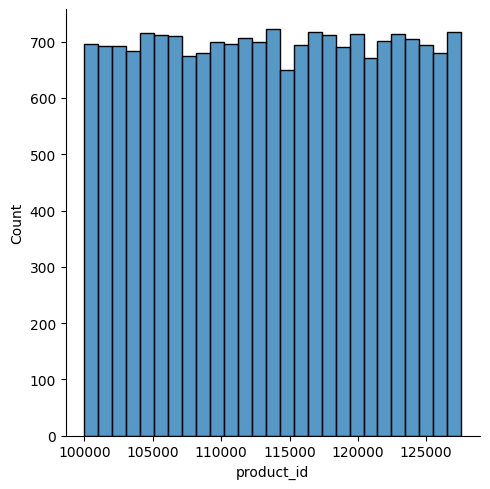

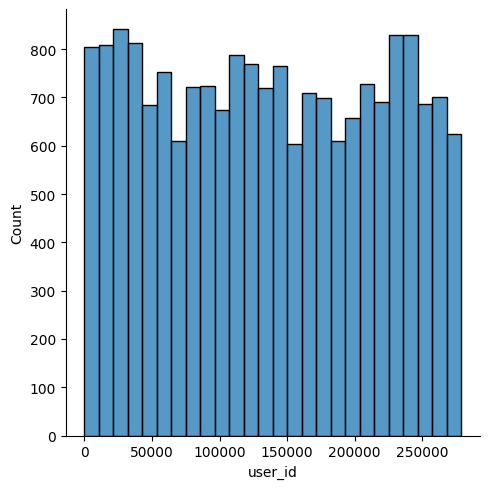

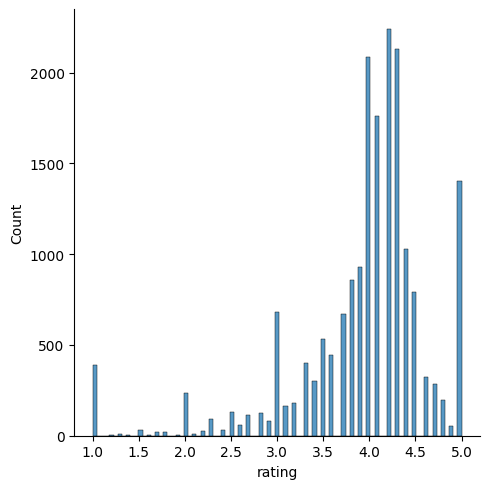

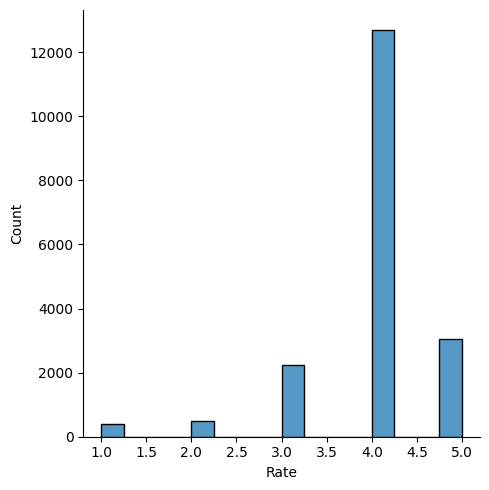

In [8]:
# Let us understand the distribution of each attributes (product_id, movie_id, rating, rate)

# Distribution of Product
sn.displot(data=df, x="product_id", kind="hist", aspect=1)

#Distribution of User
sn.displot(data=df, x="user_id", kind="hist", aspect=1)

# Distribution of rating
sn.displot(data=df, x="rating", kind="hist", aspect=1)

# Distribution of Rate
sn.displot(data=df, x="Rate", kind="hist", aspect=1)



C:\Users\91638\AppData\Local\Temp\ipykernel_14404\409049504.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


<AxesSubplot: >

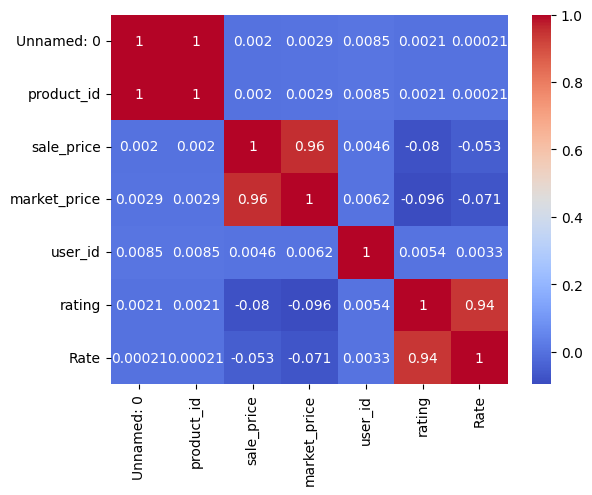

In [9]:
# Checking for correlation
import seaborn as sn
# Creating a correlation matrix from the data frame
corrMatrix = df.corr()

# Plotting using heatmap
sn.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

In [10]:
# removing duplicates
new_df = df.drop_duplicates(['user_id']) 
new_df.shape

(9739, 8)

In [11]:
new_df.head()

,Unnamed: 0,product_id,product name,sale_price,market_price,user_id,rating,Rate
0,0,100001,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.0,2,4.1,4
1,1,100002,Water Bottle - Orange,180.0,180.0,8,2.3,2
2,2,100003,"Brass Angle Deep - Plain, No.2",119.0,250.0,11400,3.4,3
3,3,100004,Cereal Flip Lid Container/Storage Jar - Assort...,149.0,176.0,11676,3.7,4
4,4,100005,Creme Soft Soap - For Hands & Body,162.0,162.0,41385,4.4,4


In [12]:
#importing package for train and split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_df, test_size=0.2, random_state=0)



In [13]:
train_data.head()

,Unnamed: 0,product_id,product name,sale_price,market_price,user_id,rating,Rate
11292,16568,116569,Chunky Shawarma Chicken,39.0,39.0,123132,4.3,4
7928,11619,111620,"Jam - Strawberry, Preserve",280.0,280.0,216211,4.4,4
1610,2379,102380,Power Toothbrush For Kids - Yellow,590.0,590.0,181995,1.0,1
9995,14626,114627,"Sauce - Pesto, Classic",290.0,290.0,157805,5.0,5
12545,18360,118361,Tissue - Napkins ECO 50 Pulls,28.5,30.0,37605,4.2,4


In [14]:
train_data.shape

(7791, 8)

In [15]:
test_data.shape

(1948, 8)

In [16]:
test_data .head()

,Unnamed: 0,product_id,product name,sale_price,market_price,user_id,rating,Rate
289,413,100414,Plastic Insulated Jr Casserole For Roti/Chapat...,739.00,910.0,210717,3.5,4
17895,26189,126190,Disposable Maternity & Nursing Breast Pads For...,155.22,199.0,56760,5.0,5
3501,5141,105142,Monaco,180.00,180.0,26711,4.1,4
5190,7580,107581,Popped Potato Chips - Simply Salt,40.00,40.0,163683,4.3,4
15330,22452,122453,Pepper & Herb Chicken Sausages,140.00,150.0,109748,4.0,4


###  Training the Data

In [17]:
# pivot the training data to create a user-item matrix
train_matrix = train_data.pivot(index='user_id', columns='product_id', values='Rate')

# fill missing values with 0
train_matrix.fillna(0, inplace=True)

# apply SVD to the training matrix
n_components = 10
svd = TruncatedSVD(n_components=n_components, random_state=42)
train_svd = svd.fit_transform(train_matrix)


### Testing the Data

In [18]:
# predict the ratings for the test data
test_matrix = test_data.pivot(index='user_id', columns='product_id', values='Rate')
test_matrix.fillna(0, inplace=True)
test_svd = svd.fit_transform(test_matrix)
test_preds = svd.inverse_transform(test_svd)

### Accuracy

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Calculate and print mean absolute error
mae = mean_absolute_error(test_matrix, test_preds)
print("Mean absolute error:", mae)

# Calculate and print mean squared error
mse = mean_squared_error(test_matrix, test_preds)
print("Mean squared error:", mse)

# Calculate and print root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

# Calculate and print coefficient of determination (R^2)
r2=r2_score(test_matrix, test_preds)
print(r2)

Mean absolute error: 0.0035640008964214686
Mean squared error: 0.008188866822487765
Root mean squared error: 0.09049235781262285
0.0046073953602771165


In [20]:
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy of the model
# accuracy = accuracy_score(test_matrix, test_preds)
# print("Logistic Regression Accuracy:",accuracy)

In [21]:
# evaluate the model using mean squared error
mse = mean_squared_error(test_matrix, test_preds)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.09049235781262285


### Building a Utility Matrix (User-Product Matrix)

#### This matrix contains each user, each product, and the rating each user gave to each product. Notice this matrix will be sparse because every user doesn't review every product.

In [22]:
product_mat = new_df.pivot(index='user_id', columns='product name', values='Rate').fillna(0)

In [23]:
new_df.shape

(9739, 8)

In [24]:
product_mat.head()

product name,& Moms - Citrus Soap,& Moms Bathing Soap - Jasmine,& Moms Bathing Soap - Tulsi,1 To 1 Baking Flour - Gluten Free,1-2-3 Noodles - Chicken Flavour,100 % Mixed Fruit Juice,100 % Pure Honey - Cinnamon,100 % Pure Honey - Litchi,100 % Pure Organic Honey - Ginger,"100% Compostable & Bio-Degradable Garbage Bags - Medium, 19X21",...,ZigZag Neem Soft Bristle Toothbrush,Zing Milk Mug - MW Z363,Zing Milk Mug - Z389,Zing Small Milk Mug - Z401,Zipper Bathroom Air Freshener - Joyful Lavender,Zipper Blissful Citrus,Zoom Ultimate Dark Triangle Pencils,aer Home Air Freshener Spray - Fresh Lush Green,nuts almonds,oriental-Instant Noodles - Tomato Flavour
user_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
product_mat.shape

(9739, 8908)

### Transposing the Matrix

#### After transpose the matrix, users are represented by columns, and products are represented by rows.

In [26]:
x = product_mat.values.T
x.shape

(8908, 9739)

### Decomposing the Matrix
#### Now we use TruncatedSVD from sklearn to compress the transposed matrix into down to a number of rows by 12 matrices. All of the Product are in the rows. But the users will be compressed down to 12 components arbitrarily that represent a generalized view of users' ID.

In [27]:


SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(x)
matrix.shape

(8908, 12)

###  Generating a Correlation Matrix
#### We calculated PearsonR coefficient for every product pair in the matrix. The correlation-based on similarities between users' preferences.

In [28]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(8908, 8908)

In [32]:
product_id = product_mat.columns
product_list = list(product_id)
coffey_hands = product_list.index("Assorted Choco Treats")
print(coffey_hands)

560


In [33]:
corr_coffey_hands  = corr[coffey_hands]
list(product_id[(corr_coffey_hands< 1.0) & (corr_coffey_hands > 0.9)])

['Aluminium Tope - Induction Base',
 'Cashews With Multimillets',
 'Chunky Chat',
 'Coffee - Blended Beans, Espresso Bold Roasted',
 'Evo - 3 Pin Universal Multi-travel Plug\xa01071',
 'Frozen Chilli Garlic Nuggets',
 'Mach 3 Shaving Razor Holder + 2 Shaving Blade/Cartridge',
 'Milk Cookies',
 'Premium Kulfi Maker With Candy Cone - Pink',
 'Roasted Sunflower Kernels',
 'Sephra Fruit Center Filled Choco Assortments.',
 'Stainless Steel Ice Bucket - Double Wall, Orbit',
 'Tablet - Organic, Bacopa, 750 mg, USDA Certified',
 'Thyme']